In [7]:
import numpy as np
import scipy
import scipy.stats
import matplotlib.pyplot as plt
import growth_simulations as g
import weakref

In [8]:
%load_ext autoreload 

In [9]:
%autoreload 2

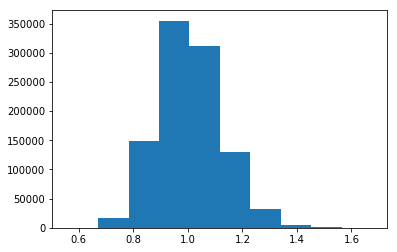

0.115470053838


In [22]:
td_std = 0.1
vb_std = td_std/(np.sqrt(0.5*1.5))
# vb_std = 0.4
xi = np.random.normal(0.0,td_std,size=10**6)
xi1 = np.random.normal(0.0,td_std,size=10**6)
D, L = 1.0, np.log(2)

vb = np.exp(np.random.normal(0.0,vb_std,size=10**6))
plt.hist(vb)
plt.show()
print vb_std

t1 = np.log(1+D/vb)/L+xi
temp = 0.5*(vb+D)*np.exp(L*xi)
t2 = np.log(1+D/temp)/L+xi1

0.00982961506461


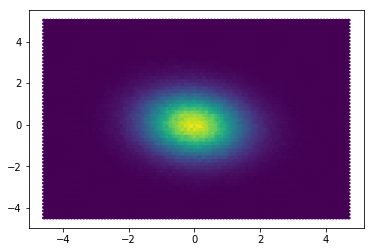

In [25]:
v1, v2 = scipy.stats.zscore(t1),scipy.stats.zscore(t2)
vals = scipy.stats.linregress(v1, v2)
print vals[2]**2
plt.hexbin(v1, v2)
plt.show()

In [47]:
vi = [1.0]
td = []
D, L=1.0, np.log(2)
tn = np.random.normal(0.0,1.0, size=10**6)
for i0 in range(10**6):
    td.append(np.log(1 + D / vi[-1]) / L + tn[i0] * 0.1)
    vi.append(vi[-1]*np.exp(L*td[-1])/2)
    

In [48]:
t1 = np.asarray(td[10**3:-1])
t2 = np.asarray(td[10**3+1:])
print len(t1), len(t2)
print scipy.stats.linregress(scipy.stats.zscore(t2), scipy.stats.zscore(t1))

998999 998999
LinregressResult(slope=-0.24820874673412111, intercept=-1.5985606831955597e-15, rvalue=-0.24820874673412144, pvalue=0.0, stderr=0.00096919274172839584)


In [4]:
td_std = [0.1, 0.1]
par1 = {'td_std': td_std, 'v_init':1.0, 'modeltype':1, 'delta':1.0, 'lambda':np.log(2), 'r':1.0}
frac1 = par1['r']/(1+par1['r'])
c=[]
temp = [0.0, 0, None, 1.0, None]
c.append(g.Cell(temp))
c[-1].grow(par1)
for i0 in range(10**6):
    temp = [c[-1].t_div, np.mod(i0,2),  weakref.proxy(c[-1]), frac1*c[-1].vd,None]
    c[-1].exists=False
    c.append(g.Cell(temp))
    c[-1].grow(par1)

In [5]:
t1 = np.asarray([obj.t_grow for obj in c[10**3:-1]])
t2 = np.asarray([obj.t_grow for obj in c[10**3+1:]])
t3 = np.asarray([obj.parent.t_grow for obj in c[10**3:-1]])
print len(t1), len(t2), len(t3)
print scipy.stats.linregress(scipy.stats.zscore(t2), scipy.stats.zscore(t1))
print scipy.stats.linregress(scipy.stats.zscore(t3), scipy.stats.zscore(t1))

999000 999000 999000
LinregressResult(slope=-0.25021779262365823, intercept=-3.931397603260627e-16, rvalue=-0.25021779262365823, pvalue=0.0, stderr=0.00096867500441647283)
LinregressResult(slope=-0.25021756647372156, intercept=-1.5183580588322062e-15, rvalue=-0.25021756647372212, pvalue=0.0, stderr=0.00096867506289167343)


In [4]:
td_std = [0.1, 0.1]
par1 = {'td_std': td_std, 'v_init':1.0, 'modeltype':1, 'delta':1.0, 'lambda':np.log(2), 'r':1.0}
frac1 = par1['r']/(1+par1['r'])
c=[]
temp = [0.0, 0, None, 1.0, None]
c.append(g.Cell(temp))
c[-1].grow(par1)
d=[]
for i0 in range(10**6):
    c, temp1 = g.next_gen_troubleshooter(-1,c,c[-1].t_div,par1)
    d.append(temp1)

In [6]:
t1 = np.asarray([obj.t_grow for obj in c[10**3:-1]])
t2 = np.asarray([obj.t_grow for obj in c[10**3+1:]])
t3 = np.asarray([obj.parent.t_grow for obj in c[10**3:-1]])

t4 = np.asarray([obj.t_grow for obj in d[10**3:-1]])
t5 = np.asarray([obj.parent.t_grow for obj in d[10**3:-1]])

print len(t1), len(t2), len(t3)
print scipy.stats.linregress(scipy.stats.zscore(t2), scipy.stats.zscore(t1))
print scipy.stats.linregress(scipy.stats.zscore(t3), scipy.stats.zscore(t1))
print scipy.stats.linregress(scipy.stats.zscore(t4), scipy.stats.zscore(t5))

999000 999000 999000
LinregressResult(slope=-0.24921818622853945, intercept=4.7990259436640232e-15, rvalue=-0.24921818622853972, pvalue=0.0, stderr=0.00096893292044355822)
LinregressResult(slope=-0.24921800880012512, intercept=5.2036061910001558e-15, rvalue=-0.24921800880012474, pvalue=0.0, stderr=0.00096893296612548705)
LinregressResult(slope=-0.24898024354417336, intercept=-1.221259374409042e-15, rvalue=-0.24898024354417325, pvalue=0.0, stderr=0.0009689946366117228)


In [7]:
td_std = [0.1, 0.1]
par1 = {'td_std': td_std, 'v_init':1.0, 'modeltype':1, 'delta':1.0, 'lambda':np.log(2), 'r':1.0, 'num_gen1':10}

init_pop = g.starting_popn(par1)
# c,obs = g.discr_time_1(par1, init_pop)
c = g.discr_gen_1(par1, init_pop)


In [9]:
t1 = np.asarray([obj.t_grow for obj in c[10**4:-1] if obj.celltype == 0])
t2 = np.asarray([obj.parent.t_grow for obj in c[10**4:-1] if obj.celltype == 0])

t3 = np.asarray([obj.t_grow for obj in c[10**4:-1] if obj.celltype == 1])
t4 = np.asarray([obj.parent.t_grow for obj in c[10**4:-1] if obj.celltype == 1])

print len(t1), len(t2), len(t3), len(t4)
print scipy.stats.linregress(scipy.stats.zscore(t2), scipy.stats.zscore(t1))
print scipy.stats.linregress(scipy.stats.zscore(t4), scipy.stats.zscore(t3))

97350 97350 97349 97349
LinregressResult(slope=-0.25544287500872453, intercept=-2.224963377215921e-17, rvalue=-0.25544287500872448, pvalue=0.0, stderr=0.0030987316885943269)
LinregressResult(slope=-0.2481034595953244, intercept=1.0542514924922363e-16, rvalue=-0.24810345959532432, pvalue=0.0, stderr=0.0031048673519403131)
